In [2]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import learning_curve,train_test_split,GridSearchCV #GridSearchCV自動調參
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler #去均值和方差归一化 均值为 0，方差为 1 的正态分布
from sklearn.metrics import accuracy_score #分類準確率分數
from sklearn.svm import SVC #分類器
from sklearn.tree import DecisionTreeClassifier #決策樹
from sklearn.ensemble import RandomForestClassifier #隨機森林
from sklearn.neighbors import KNeighborsClassifier #KNN
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签

In [3]:
#讀取數據
data=pd.read_csv('UCI_Credit_Card.csv')

In [4]:
print(data.shape) #查看數據集大小
print(data.describe())

(30000, 25)
                 ID       LIMIT_BAL           SEX     EDUCATION      MARRIAGE  \
count  30000.000000    30000.000000  30000.000000  30000.000000  30000.000000   
mean   15000.500000   167484.322667      1.603733      1.853133      1.551867   
std     8660.398374   129747.661567      0.489129      0.790349      0.521970   
min        1.000000    10000.000000      1.000000      0.000000      0.000000   
25%     7500.750000    50000.000000      1.000000      1.000000      1.000000   
50%    15000.500000   140000.000000      2.000000      2.000000      2.000000   
75%    22500.250000   240000.000000      2.000000      2.000000      2.000000   
max    30000.000000  1000000.000000      2.000000      6.000000      3.000000   

                AGE         PAY_0         PAY_2         PAY_3         PAY_4  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean      35.485500     -0.016700     -0.133767     -0.166200     -0.220667   
std        9.217904  

In [5]:
#查看 下一個月 違約率的情況
next_month=data['default.payment.next.month'].value_counts()
next_month

0    23364
1     6636
Name: default.payment.next.month, dtype: int64

In [6]:
df=pd.DataFrame({'default.payment.next.month':next_month.index,'values':next_month.values})
df.head()

,default.payment.next.month,values
0,0,23364
1,1,6636


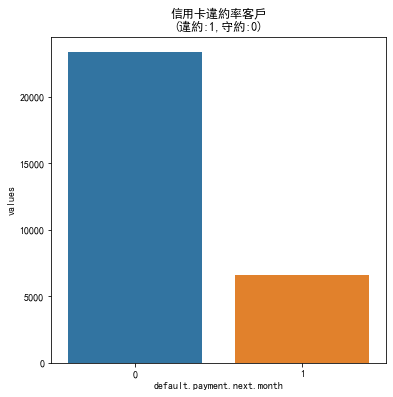

In [7]:
plt.figure(figsize=(6,6))
plt.title('信用卡違約率客戶\n(違約:1,守約:0)')
sns.set_color_codes('pastel') #調色
sns.barplot(x='default.payment.next.month',y='values',data=df)
locs, labels = plt.xticks() #xticks()返回了两个对象,一个是刻标(locs)，另一个是刻度标签
plt.show()

In [8]:
#特征選擇
#ID字段沒用,去掉ID字段
# data.drop(['ID'],inplace=True,axis=1)
target=data['default.payment.next.month'].values
columns=data.columns.tolist() #列名轉成列表形式
columns.remove('default.payment.next.month')#刪除
features=data[columns].values

In [9]:
#30%作為測試集,其餘作為訓練集
train_x,test_x,train_y,test_y=train_test_split(features,target,test_size=0.30,stratify=target,random_state=1)

#構造各種分類器
classifiers=[
    SVC(random_state=1,kernel='rbf'),
    DecisionTreeClassifier(random_state=1,criterion='gini'),
    RandomForestClassifier(random_state=1,criterion='gini'),
    KNeighborsClassifier(metric='minkowski'),
]

# 分類器名稱
classifier_names=[
    'svc',
    'decisiontreeclassifier',
    'randomforestclassifier',
    'kneighborsclassifier',
]

#分類器參數
classifier_param_grid=[
    {'svc__C':[1],'svc__gamma':[0.01]},
    {'decisiontreeclassifier__max_depth':[6,9,11]},
    {'randomforestclassifier__n_estimators':[3,5,6]},
    {'kneighborsclassifier__n_neighbors':[4,6,8]},
]

In [10]:
#對具體的分類器進行GridSearchCV參數調優
def GridSearchCV_work(pipeline,train_x,train_y,test_x,test_y,param_grid,score='accuracy'):
    response={}
    gridsearch=GridSearchCV(estimator=pipeline,param_grid=param_grid,scoring=score)
    #尋找最優的參數,和最優的準確率分數
    search=gridsearch.fit(train_x,train_y)#訓練模型
    print('GridSearch最優參數:',search.best_params_)
    print('GridSearch最優分數: %0.41f'%search.best_score_)
    predict_y=gridsearch.predict(test_x) #訓練完的模型對測試集進行預測
    print('準確率 %0.41f'%accuracy_score(test_y,predict_y))
    response['predict_y']=predict_y
    response['accuracy_score']=accuracy_score(test_y,predict_y)
    return response
    
for model ,model_name,model_param_grid in zip(classifiers,classifier_names,classifier_param_grid):
    pipeline=Pipeline([
        ('scaler',StandardScaler()),
        (model_name,model)
    ])
    result=GridSearchCV_work(pipeline,train_x,train_y,test_x,test_y,model_param_grid,score='accuracy')

GridSearch最優參數: {'svc__C': 1, 'svc__gamma': 0.01}
GridSearch最優分數: 0.81885714285714283899864085469744168221951
準確率 0.81855555555555559177349778110510669648647
GridSearch最優參數: {'decisiontreeclassifier__max_depth': 6}
GridSearch最優分數: 0.82019047619047624753108038930804468691349
準確率 0.81544444444444441622010799619602039456367
GridSearch最優參數: {'randomforestclassifier__n_estimators': 6}
GridSearch最優分數: 0.79957142857142859959651559620397165417671
準確率 0.80100000000000004529709940470638684928417
GridSearch最優參數: {'kneighborsclassifier__n_neighbors': 8}
GridSearch最優分數: 0.80204761904761912028050119261024519801140
準確率 0.80400000000000004796163466380676254630089
